In [42]:
# [Notebook :: Anaconda Cloud](https://anaconda.org/bfiedler/n020_conwaygameoflife/notebook)

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from IPython.core.display import HTML
import time as Time
import math
import matplotlib.animation as animation
import urllib.request
import seaborn as sns
%matplotlib inline

custom_style = {'axes.labelcolor': 'white',
                'xtick.color': 'white',
                'ytick.color': 'white'}
sns.set_style("darkgrid", rc=custom_style)

HTML(urllib.request.urlopen('https://anaconda.org/bfiedler/data/1/download/metr4323.css').read().decode())


In [63]:
def periodic(a):
    a[0,:] = a[-2,:]
    a[-1,:] = a[1,:]
    a[:,0] = a[:,-2]
    a[:,-1] = a[:,1]

def slowstep(b):
    I, J = b.shape
    s = b.copy()
    for i in range(1, I-1):
        for j in range(1, J-1):
            n = (b[i+1, j-1] + b[i+1, j] + b[i+1, j+1] +
                    b[i, j-1] +               b[i, j+1]  +
                    b[i-1, j-1] + b[i-1, j] + b[i-1, j+1])
            if b[i,j] == 1 and (n < 2 or n > 3):
                s[i,j] = 0
            elif b[i,j] == 0 and n == 3:
                s[i,j] = 1
    b[:,:] = s
                
def neighbors(b):
    return (b[2:,:-2] + b[2:, 1:-1] + b[2:, 2:] +
            b[1:-1, :-2] +              b[1:-1, 2:] +
            b[:-2, :-2] + b[:-2, 1:-1] + b[:-2, 2:]
           )

def faststep(b):
    n = neighbors(b)
    b[1:-1, 1:-1] = np.where(np.logical_or(n==3, np.logical_and(b[1:-1, 1:-1], n==2)), 1, 0)
        
        
glider = np.array([[1,0,0], [0,1,1], [1,1,0]])

N = 10
init_choice = 1
enforce_periodic = True

c = np.zeros((N, N), dtype=int)

if init_choice == 0:
    c[1:-1, 1:-1] = np.random.choice((1,0), (N-2)**2, p=(0.3, 0.7)).reshape((N-2, N-2))

elif init_choice == 1:
    c[1:4, 1:4] = glider
    
elif init_choice == 2:
    print("not implemented yet")
    
# print(c)
# print()

if enforce_periodic:
    periodic(c)
    print("apply periodic")
#     print(c)
    
# myfig, myaxis = plt.subplots(figsize=(6,6))
# myaxis.axis('off')
# plt.title('showing whole computational domain')
# myaxis.imshow(c, interpolation="nearest")

apply periodic


In [60]:
# q = c[1:-1, 1:-1]
# myfig, myaxis = plt.subplots(figsize=(6,6))
# myaxis.axis('off')
# plt.title('showing one tile')

# myaxis.imshow(q, interpolation="nearest")

In [59]:
# print(c)
# print(neighbors(c))

[[0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 1]
 [0 0 1 1 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 1]]
[[1 3 2 1 0 0 0 1]
 [4 4 2 1 0 0 0 2]
 [2 3 3 1 0 0 0 1]
 [2 2 1 0 0 0 0 1]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 1]]


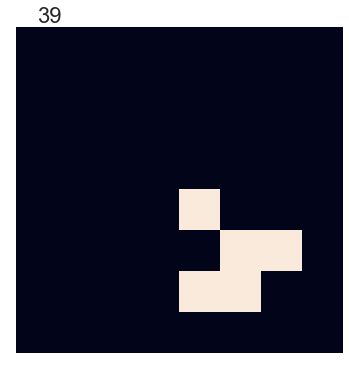

In [68]:
nsteps = 40
step_type = 1
myfig, myaxis = plt.subplots(figsize=(6, 6))
myaxis.axis('off')
count=0
while count < nsteps:
    if step_type == 1:
        faststep(c)
    elif step_type == 0:
        slowstep(c)
    else:
        print("not implemented yet")
    if enforce_periodic: periodic(c)
    
    myaxis.clear()
    myaxis.imshow(c[1:-1, 1:-1], interpolation="nearest")
    myaxis.text(.0, -0.6, '{0:d}'.format(count), fontsize=22)
    myaxis.axis("off")
    
    clear_output(wait=True)
    display(myfig)
    Time.sleep(0.1)
    
    count += 1
plt.close()

In [64]:
# a = np.array([[1,2,3,4], [5,6,7,8]])

# print("a[0,:]= ",a[0,:])
# print("a[-2,:]= ",a[-2,:])
# print("a[-1,:]= ",a[-1,:])
# print("a[1,:]= ",a[1,:])
# print("a[:,0]= ",a[:,0])
# print("a[:,-2]= ",a[:,-2])
# print("a[:,-1]= ",a[:,-1])
# print("a[:,1]= ",a[:,1])


# print(a)
# periodic(a)
# print(a)

In [65]:
# a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12], [13,14,15,16]])

# print("a[0,:]= ",a[0,:])
# print("a[-2,:]= ",a[-2,:])
# print("a[-1,:]= ",a[-1,:])
# print("a[1,:]= ",a[1,:])
# print("a[:,0]= ",a[:,0])
# print("a[:,-2]= ",a[:,-2])
# print("a[:,-1]= ",a[:,-1])
# print("a[:,1]= ",a[:,1])


# print(a)
# periodic(a)
# print(a)